In [1]:
# Importing dependancies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the data 
df = pd.read_csv('zillow_data.csv')

# Printing Size of dataframe
print("The dataframe is {} columns by {} rows".format(df.shape[1],df.shape[0]))

# Previewing the dataframe
df.head()

The dataframe is 272 columns by 14723 rows


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


**Finding null values**

In [3]:
def desc_nulls(df):
    # Get count and non_null_values
    df_null_desc = df.isnull().describe()

    # Add row for number of null_values 
    df_null_desc= df_null_desc.append(df_null_desc.iloc[0] - df_null_desc.iloc[3],ignore_index=True)

    # Restructuring the dataframe 
    df_null_desc['index'] = pd.Series(['count','unique','top' ,'non_null_values', 'null_values'])
    df_null_desc.set_index(df_null_desc['index'],inplace=True)
    df_null_desc.drop('index',axis=1,inplace=True)
    df_null_desc = df_null_desc.iloc[[0,3,4]]

    # Calculating statistics
    tot_values = df_null_desc.iloc[0].sum()
    num_null_values = tot_values -df_null_desc.iloc[1].sum()

    # Printing statistics
    print("Total number of entries: {}\nTotal number of null entries: {}".format(tot_values,num_null_values))
    print("{}% of values are nulls".format(round(num_null_values/tot_values*100,3)))

    # Viewing the null dataframe
    return df_null_desc

desc_nulls(df)

Total number of entries: 4004656
Total number of null entries: 157934
3.944% of values are nulls


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
index,,,,,,,,,,,,,,,,,,,,,
count,14723,14723,14723,14723,14723,14723,14723,14723,14723,14723,...,14723,14723,14723,14723,14723,14723,14723,14723,14723,14723
non_null_values,14723,14723,14723,14723,13680,14723,14723,13684,13684,13684,...,14723,14723,14723,14723,14723,14723,14723,14723,14723,14723
null_values,0,0,0,0,1043,0,0,1039,1039,1039,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Example of a row with NaN values before cleaning 
df.iloc[[20]]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
20,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300


In [5]:
# Same row after cleaning
df.fillna(0,inplace=True)
df.iloc[[20]]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
20,61625,10011,New York,NY,New York,New York,21,0.0,0.0,0.0,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300


In [6]:
# Checking cleaning results
desc_nulls(df)

Total number of entries: 4004656
Total number of null entries: 0
0.0% of values are nulls


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
index,,,,,,,,,,,,,,,,,,,,,
count,14723,14723,14723,14723,14723,14723,14723,14723,14723,14723,...,14723,14723,14723,14723,14723,14723,14723,14723,14723,14723
non_null_values,14723,14723,14723,14723,14723,14723,14723,14723,14723,14723,...,14723,14723,14723,14723,14723,14723,14723,14723,14723,14723
null_values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_plot = df.drop(['RegionID','City','Metro','CountyName','SizeRank'],axis=1)
df_plot.set_index('RegionName',inplace=True)
df_plot

,State,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
RegionName,,,,,,,,,,,,,,,,,,,,,
60657,IL,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
75070,TX,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
77494,TX,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
60614,IL,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
79936,TX,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,MA,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
3293,NH,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,91300.0,90900.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
40404,KY,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,58700.0,59100.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400


In [8]:
x= df_plot.loc[(df_plot['State']== 'MA')]

In [9]:
x.drop('State',axis=1,inplace=True)

/Users/ranykhalil/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_names = x.columns.tolist()
df_diff = pd.DataFrame({})
for index, item in enumerate(column_names[1:]):
    new_column = "(" + item + ")-(" + column_names[index] + ")"
#    df_diff[new_column] = (x[item] - x[column_names[index]])*100/(x[column_names[index]])
#     df_diff[new_column] = np.log(x[item]) - np.log(x[column_names[0]]) # as % plot
#     df_diff[new_column] = np.log(x[item]) - np.log(x[column_names[index]]) # as returns
    df_diff[new_column] = (x[item] - x[column_names[index]])*100/ (x[column_names[index]])

# df_diff
# df_diff = scaler.fit_transform(df_diff)

df_diff.fillna(0,inplace=True)
# df_diff = scaler.fit_transform(df_diff)
# df_diff.min()
df_diff.describe()
df_diff.iloc[4].tail(50).sum()
# .sum()
# plt.scatter(df_diff.describe().iloc[6],df_diff.columns)

#     df_diff[new_column] = column_names[item] - column_names[index] 
# df_diff 

43.18277348307508

In [11]:
# # sns.heatmap(df.iloc[:30])
# plt.figure(figsize=(40, len(df_diff)/4))
# sns.heatmap(df_diff,cmap="plasma")
# # plt.gcf().autofmt_xdate()

In [12]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [13]:
get_datetimes(x)

DatetimeIndex(['1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=264, freq=None)

In [14]:
def melt_data(df):
    melted = pd.melt(df, id_vars=list(df.columns[:7]), var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [15]:
ma_melted_df = melt_data(df.loc[(df['State']== 'MA')])
ma_melted_df

,value
time,
1996-04-01,158535.731415
1996-05-01,158880.335731
1996-06-01,159230.935252
1996-07-01,159586.570743
1996-08-01,159944.124700
...,...
2017-12-01,448427.338129
2018-01-01,450776.978417
2018-02-01,453590.647482


In [16]:
melt_data(df)

,value
time,
1996-04-01,109950.770903
1996-05-01,110062.229165
1996-06-01,110172.254296
1996-07-01,110279.739184
1996-08-01,110397.948788
...,...
2017-12-01,281095.320247
2018-01-01,282657.060382
2018-02-01,284368.688447


In [17]:
state_melted_df = pd.DataFrame()
state_pct_df = pd.DataFrame()
state_pct_df_first = pd.DataFrame()
for index, state in enumerate(list(df['State'].unique())):
    column_name = "melted_" + state
    pct_change = column_name + '_pct_change'
    state_melted_df[column_name] = melt_data(df.loc[(df['State']== state)])['value']
    state_pct_df[pct_change] = state_melted_df[column_name].pct_change() * 100
    state_pct_df = state_pct_df.iloc[1:]
    state_pct_df_first[pct_change] = state_melted_df[column_name]/state_melted_df[column_name][0]
# state_pct_df
# state_pct_df.columns[(state_pct_df < -.4).any()]
# state_pct_df[list(set(state_pct_df.columns) - set(state_pct_df.columns[((state_pct_df < -0.4) & (state_pct_df <-0.4001 ) ).any()]))].plot()
# state_pct_df[list(set(state_pct_df.columns) - set(state_pct_df.columns[((state_pct_df < -0.45)).any()]))].plot()


# state_pct_df_first.plot(figsize=(20,40))
# state_melted_df.plot()
# state_melted_df[['melted_NY','melted_TX']].plot()

# state_pct_df[['melted_OK_pct_change','melted_IA_pct_change']].plot()
state_melted_df


,melted_IL,melted_TX,melted_NY,melted_CA,melted_FL,melted_TN,melted_NC,melted_GA,melted_DC,melted_MO,...,melted_ME,melted_SD,melted_WV,melted_IA,melted_RI,melted_NE,melted_WY,melted_AK,melted_NH,melted_VT
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,122025.045704,104407.583418,126087.290640,194332.107843,101865.859873,65269.554455,85609.112150,80791.014493,189216.666667,76860.188088,...,87939.534884,28589.473684,55384.722222,73434.810127,125286.440678,75455.421687,107390.322581,128382.142857,104979.396985,82825.00
1996-05-01,122273.674589,104428.816987,126012.610837,194238.807190,101929.299363,65519.801980,85845.327103,81107.536232,188611.111111,77070.532915,...,87805.813953,28757.894737,55479.166667,73644.936709,125166.101695,76136.144578,107429.032258,128832.142857,104968.844221,82556.25
1996-06-01,122425.045704,104471.284125,125940.394089,194152.532680,101995.796178,65770.792079,86056.074766,81427.826087,188011.111111,77297.178683,...,87669.767442,28926.315789,55590.277778,73836.075949,125044.067797,76768.674699,107412.903226,129253.571429,104975.376884,82306.25
1996-07-01,122466.727605,104538.220425,125860.886700,194084.232026,102058.853503,66015.841584,86258.878505,81751.884058,187438.888889,77535.109718,...,87527.906977,29100.000000,55706.944444,74006.962025,124898.305085,77353.012048,107335.483871,129639.285714,104976.884422,82037.50
1996-08-01,122408.409506,104626.491405,125792.118227,194077.614379,102146.496815,66251.485149,86471.261682,82076.231884,186900.000000,77792.476489,...,87395.348837,29294.736842,55847.222222,74146.835443,124779.661017,77860.240964,107251.612903,130028.571429,104994.974874,81781.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,209385.009141,193761.274014,377217.339901,723263.480392,280250.955414,146519.306931,188693.691589,197647.246377,790450.000000,158654.858934,...,252315.116279,188426.315789,124022.222222,168377.848101,302398.305085,171379.518072,227525.806452,322657.142857,262493.467337,216318.75
2018-01-01,210173.674589,194417.492417,378981.773399,729496.405229,281561.401274,147265.841584,189339.252336,198727.826087,793622.222222,159461.755486,...,253573.255814,189621.052632,124104.166667,168781.645570,305052.542373,172192.771084,228564.516129,323775.000000,263781.909548,214750.00
2018-02-01,211044.424132,195503.134479,380702.463054,735525.980392,283416.178344,148351.980198,190244.859813,199670.434783,798838.888889,160400.626959,...,254622.093023,191110.526316,124334.722222,169272.151899,306791.525424,173245.783133,229938.709677,324167.857143,265240.201005,213581.25


In [77]:
list1 = list(draw_down_df['Highest_date'].index)

,State,Highest_date,Lowest_date
0,IL,2007-03-01,2012-03-01
1,TX,2007-12-01,2011-12-01
2,NY,2006-07-01,2012-10-01
3,CA,2006-06-01,2012-01-01
4,FL,2006-07-01,2011-11-01
5,TN,2007-08-01,2012-02-01
6,NC,2007-10-01,2012-04-01
7,GA,2007-06-01,2012-03-01
8,DC,2007-08-01,2011-09-01
9,MO,2007-03-01,2012-05-01


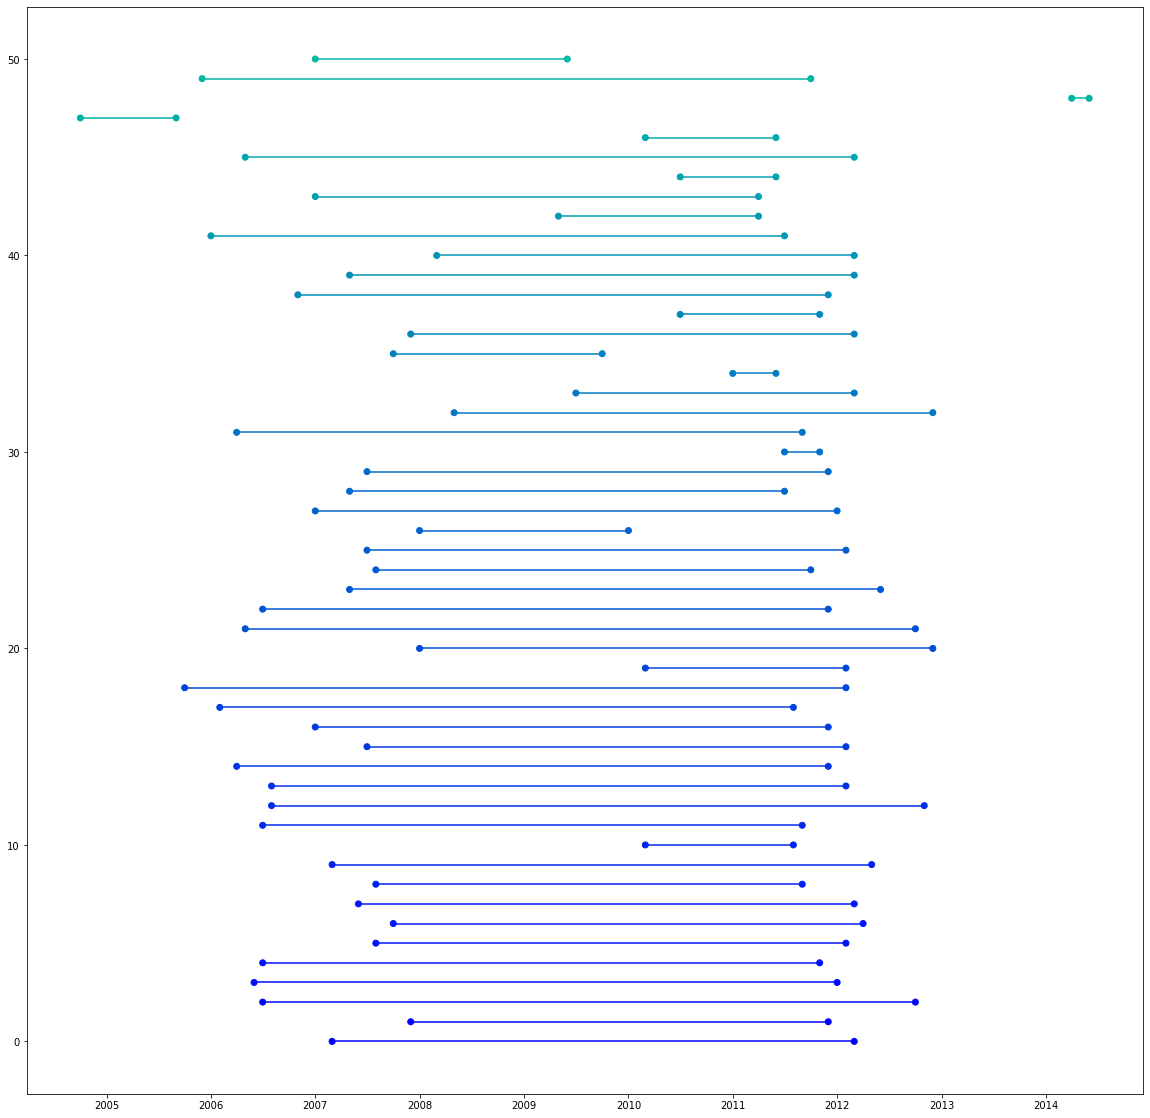

In [106]:
draw_down_df = pd.DataFrame(columns=['State', 'Highest_date', 'Lowest_date'])

for state in list(state_melted_df.columns):
    xs= state_melted_df[state]
    trough = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
    peak = np.argmax(xs[:trough])
    draw_down_df = draw_down_df.append({'State': state.strip("melted_"), 'Highest_date': peak.date(), 'Lowest_date': trough.date()}, ignore_index=True)


bb = 100
cmap = plt.cm.get_cmap('winter', 70)

# N, bins, patches = plt.hist(draw_down_df['Highest_date'],bins =bb)
import random

bb = 100
shuffled_idx = draw_down_df.index.to_list()
# random.shuffle(shuffled_idx)

plt.figure(figsize=(20,20))
plt.scatter(draw_down_df['Highest_date'],draw_down_df.index, color=cmap(shuffled_idx))
plt.scatter(draw_down_df['Lowest_date'],draw_down_df.index, color=cmap(shuffled_idx))

def connectpoints(x1,x2,y1, color):
    plt.plot([x1,x2],[y1,y1],'k-', color=color)
    
list(draw_down_df['Highest_date'])
# connectpoints(list(draw_down_df['Highest_date']),list(draw_down_df['Lowest_date']),0,1,cmap(shuffled_idx))


for i in range(0,51):
    connectpoints(draw_down_df['Highest_date'][i],draw_down_df['Lowest_date'][i],i ,cmap(shuffled_idx[i]))


draw_down_df

Maximum drops these states had in 1 month


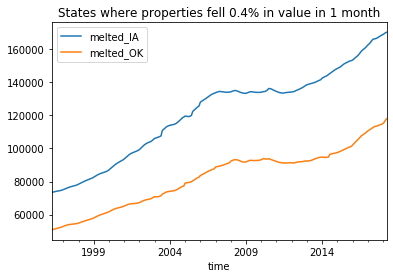

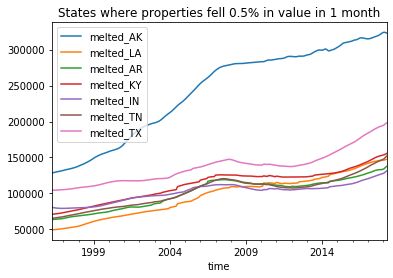

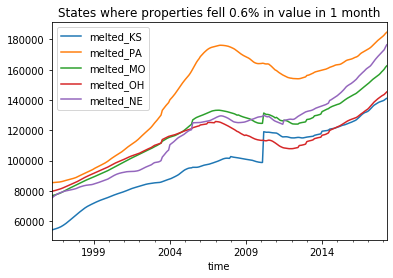

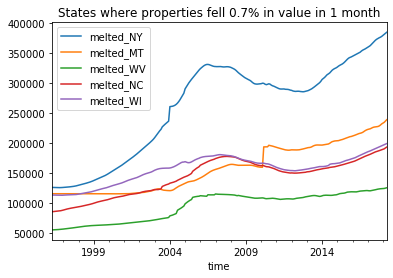

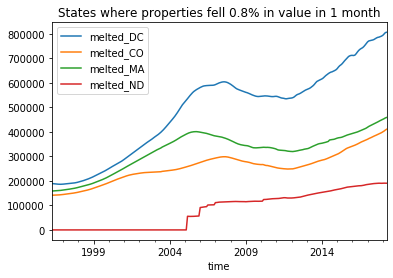

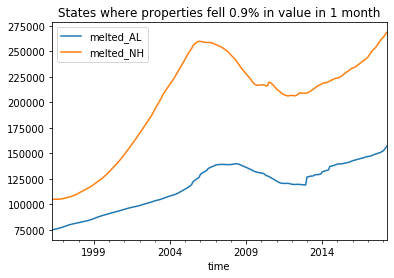

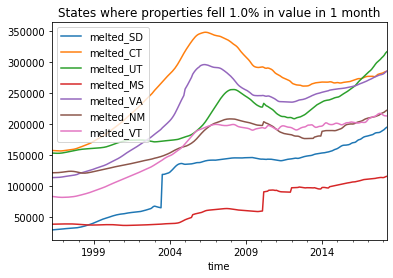

In [97]:
def plot_graphs(df,df_pct,min_loss,max_loss,step):
    plotted = []
    loss = min_loss * -1
    while loss >= max_loss*-1:
        array = list(set(df_pct.columns) - set(df_pct.columns[(df_pct < loss).any()]) - set(plotted))
        mylst = map(lambda x:x.strip("_pct_change"), array)
        plotted.extend(list(set(df_pct.columns) - set(df_pct.columns[(df_pct < loss).any()])))
        df[mylst].plot(title='States where properties fell {}% in value in 1 month'.format(round(loss*-1,2)))
        loss -= step
            
plot_graphs(state_melted_df,state_pct_df,0.4,1,0.1)
# state_pct_df.min()
print("Maximum drops these states had in 1 month")

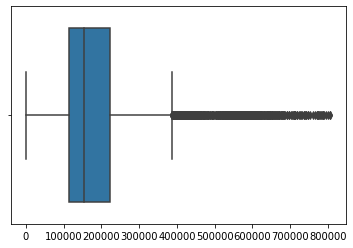

In [107]:
# state_melted_df.iloc[:,:5].plot(figsize=(20,20))
# state_melted_df.iloc[:,5:10].plot(figsize=(20,20))
# state_melted_df.iloc[:,10:15].plot(figsize=(20,20))
# state_melted_df.iloc[:,15:20].plot(figsize=(20,20))
# state_melted_df.iloc[:,20:25].plot(figsize=(20,20))
# state_melted_df.iloc[:,25:30].plot(figsize=(20,20))
# state_melted_df.iloc[:,30:35].plot(figsize=(20,20))
sns.boxplot(state_melted_df)


In [108]:
# state_melted_df[['melted_SD','melted_IA','melted_NE','melted_AK','melted_VT']].plot()
# state_melted_df[['melted_MS']].plot()
# state_melted_df[['melted_OK']].plot()
# state_melted_df[['melted_TX']].plot()


In [109]:
melted = melt_data(df)

In [110]:
melted['value_pct_change'] = melted['value'].pct_change()
melted

,value,value_pct_change
time,,
1996-04-01,109950.770903,NaN
1996-05-01,110062.229165,0.001014
1996-06-01,110172.254296,0.001000
1996-07-01,110279.739184,0.000976
1996-08-01,110397.948788,0.001072
...,...,...
2017-12-01,281095.320247,0.005633
2018-01-01,282657.060382,0.005556
2018-02-01,284368.688447,0.006055


In [111]:
inflation = pd.read_csv('CSUSHPINSA.csv')
inflation['DATE'] = pd.to_datetime(inflation['DATE'])
inflation.set_index('DATE', inplace=True)
inflation = inflation['1996-04' : '2018-04']
inflation['CSUSHPINSA_pct_change'] = inflation['CSUSHPINSA'].pct_change()

In [112]:
inflation_merged = pd.concat([melted,inflation], axis=1)
inflation_merged['adjusted'] = inflation_merged['value'] / inflation_merged['CSUSHPINSA']

In [113]:
inflation_merged

,value,value_pct_change,CSUSHPINSA,CSUSHPINSA_pct_change,adjusted
1996-04-01,109950.770903,NaN,82.144,NaN,1338.512501
1996-05-01,110062.229165,0.001014,82.622,0.005819,1332.117707
1996-06-01,110172.254296,0.001000,83.070,0.005422,1326.258027
1996-07-01,110279.739184,0.000976,83.443,0.004490,1321.617621
1996-08-01,110397.948788,0.001072,83.671,0.002732,1319.429059
...,...,...,...,...,...
2017-12-01,281095.320247,0.005633,195.970,0.002045,1434.379345
2018-01-01,282657.060382,0.005556,196.241,0.001383,1440.356808
2018-02-01,284368.688447,0.006055,197.032,0.004031,1443.261442
2018-03-01,286511.376757,0.007535,198.696,0.008445,1441.958453


In [114]:
inflation_merged['adjusted_pct_change'] = inflation_merged['adjusted'].pct_change()
inflation_merged = inflation_merged.iloc[1:]
inflation_merged

,value,value_pct_change,CSUSHPINSA,CSUSHPINSA_pct_change,adjusted,adjusted_pct_change
1996-05-01,110062.229165,0.001014,82.622,0.005819,1332.117707,-0.004778
1996-06-01,110172.254296,0.001000,83.070,0.005422,1326.258027,-0.004399
1996-07-01,110279.739184,0.000976,83.443,0.004490,1321.617621,-0.003499
1996-08-01,110397.948788,0.001072,83.671,0.002732,1319.429059,-0.001656
1996-09-01,110534.829858,0.001240,83.727,0.000669,1320.181421,0.000570
...,...,...,...,...,...,...
2017-12-01,281095.320247,0.005633,195.970,0.002045,1434.379345,0.003580
2018-01-01,282657.060382,0.005556,196.241,0.001383,1440.356808,0.004167
2018-02-01,284368.688447,0.006055,197.032,0.004031,1443.261442,0.002017
2018-03-01,286511.376757,0.007535,198.696,0.008445,1441.958453,-0.000903


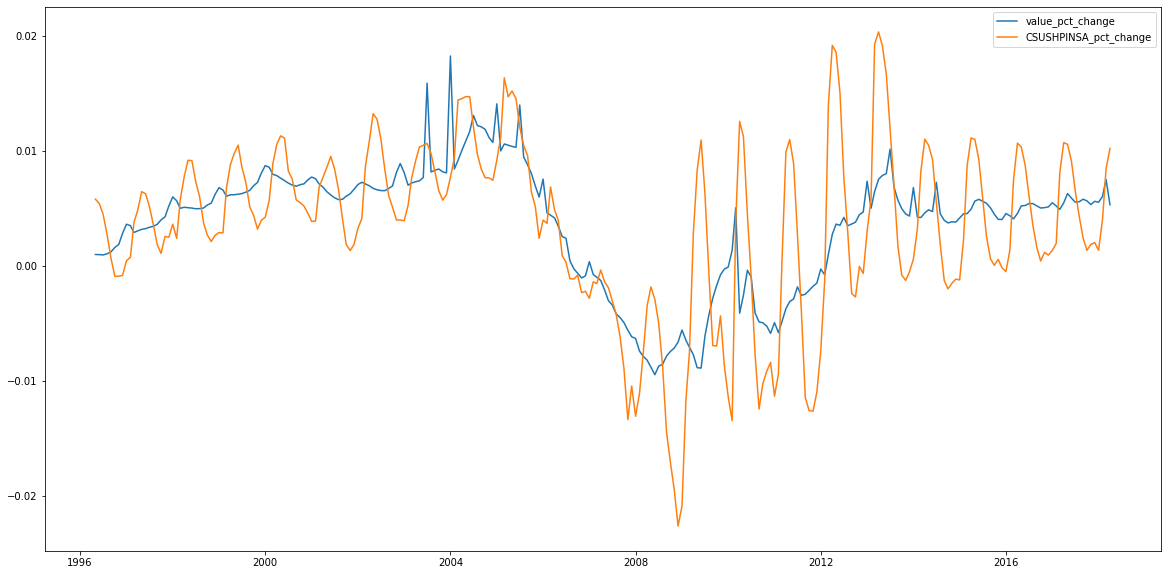

In [115]:
plt.figure(figsize=(20,10))
plt.plot(inflation_merged.index,inflation_merged['value_pct_change'],inflation_merged['CSUSHPINSA_pct_change'])
labels = ['value_pct_change','CSUSHPINSA_pct_change']
plt.legend(labels)

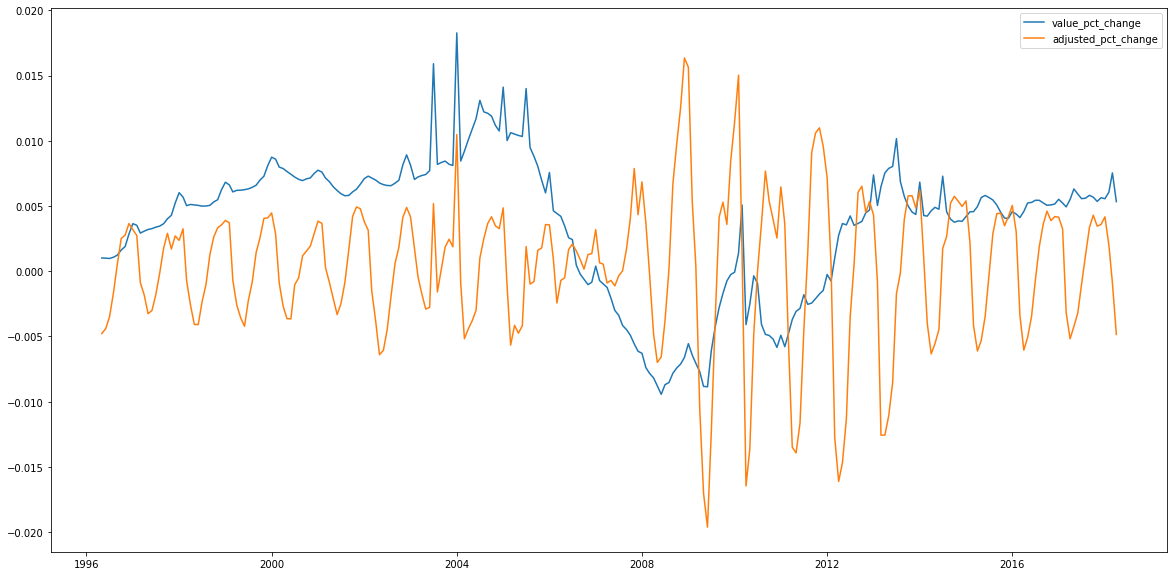

In [116]:
plt.figure(figsize=(20,10))
plt.plot(inflation_merged.index,inflation_merged['value_pct_change'],inflation_merged['adjusted_pct_change'])
labels = ['value_pct_change','adjusted_pct_change']
plt.legend(labels)

In [117]:
inflation_merged

,value,value_pct_change,CSUSHPINSA,CSUSHPINSA_pct_change,adjusted,adjusted_pct_change
1996-05-01,110062.229165,0.001014,82.622,0.005819,1332.117707,-0.004778
1996-06-01,110172.254296,0.001000,83.070,0.005422,1326.258027,-0.004399
1996-07-01,110279.739184,0.000976,83.443,0.004490,1321.617621,-0.003499
1996-08-01,110397.948788,0.001072,83.671,0.002732,1319.429059,-0.001656
1996-09-01,110534.829858,0.001240,83.727,0.000669,1320.181421,0.000570
...,...,...,...,...,...,...
2017-12-01,281095.320247,0.005633,195.970,0.002045,1434.379345,0.003580
2018-01-01,282657.060382,0.005556,196.241,0.001383,1440.356808,0.004167
2018-02-01,284368.688447,0.006055,197.032,0.004031,1443.261442,0.002017
2018-03-01,286511.376757,0.007535,198.696,0.008445,1441.958453,-0.000903


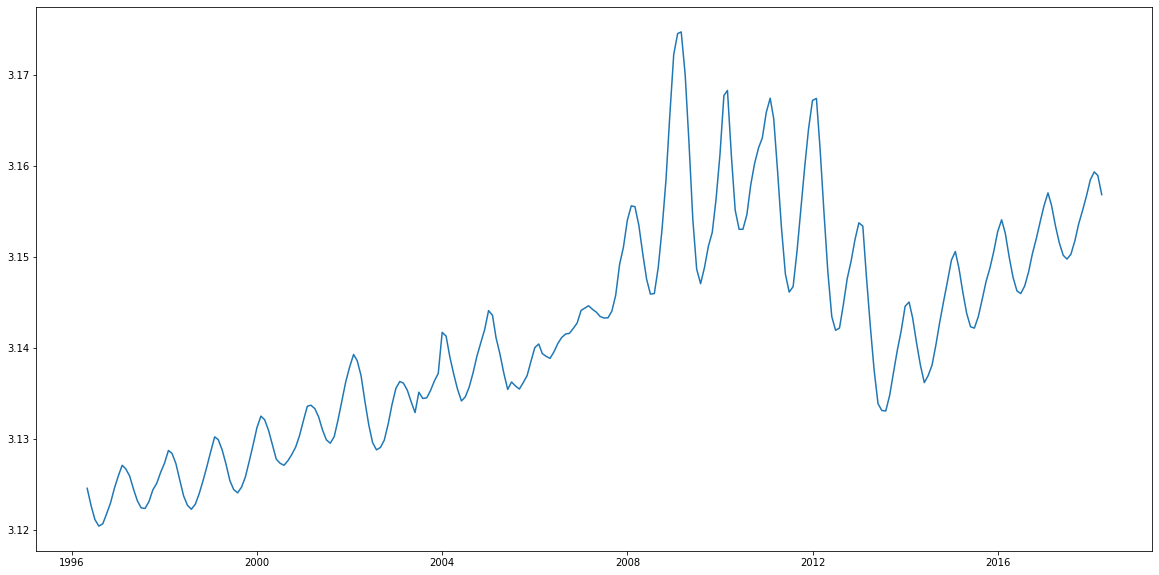

In [118]:
plt.figure(figsize=(20,10))
plt.plot(inflation_merged.index,np.log10(inflation_merged['adjusted']))

In [119]:
from statsmodels.tsa.stattools import adfuller
adfuller(inflation_merged['adjusted'])

(-1.368412662946405,
 0.5973223467745958,
 13,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1288.616187271941)

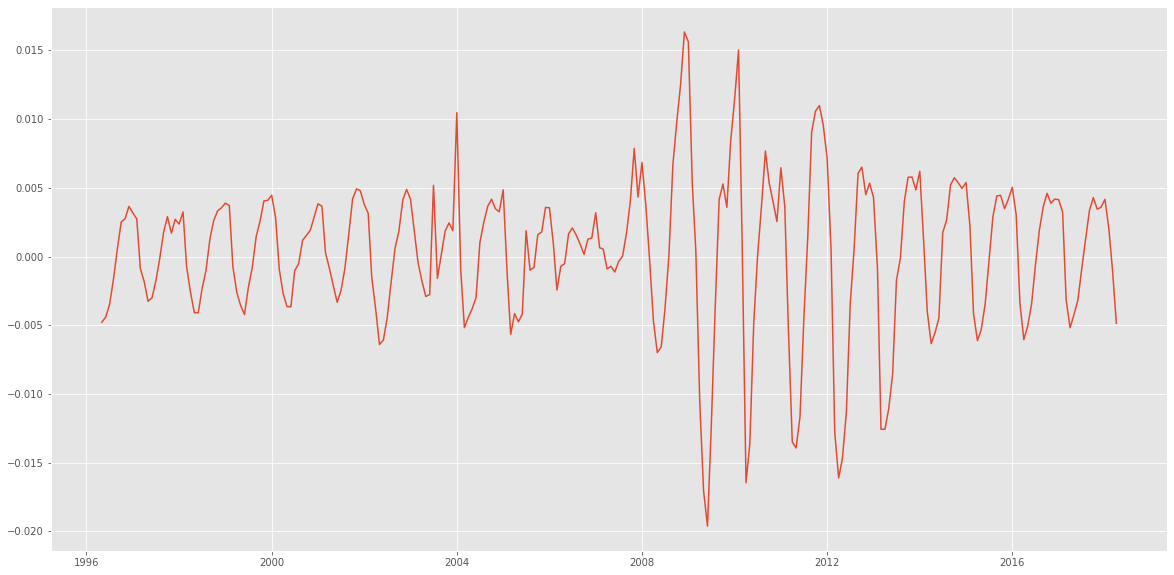

In [101]:
plt.figure(figsize=(20,10))
plt.plot(inflation_merged.index,inflation_merged['adjusted_pct_change'])

In [102]:
adfuller(inflation_merged['adjusted_pct_change'])

(-4.4984109787586135,
 0.00019794402366219902,
 12,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 -2298.168768555293)

                               ARMA Model Results                              
Dep. Variable:     adjusted_pct_change   No. Observations:                  260
Model:                      ARMA(1, 0)   Log Likelihood                1106.642
Method:                        css-mle   S.D. of innovations              0.003
Date:                 Tue, 05 May 2020   AIC                          -2207.284
Time:                         12:25:47   BIC                          -2196.602
Sample:                     05-01-1996   HQIC                         -2202.989
                          - 12-01-2017                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0003      0.001      0.270      0.787      -0.002       0.002
ar.L1.adjusted_pct_change     0.7807      0.038     20.301      0.000       0.

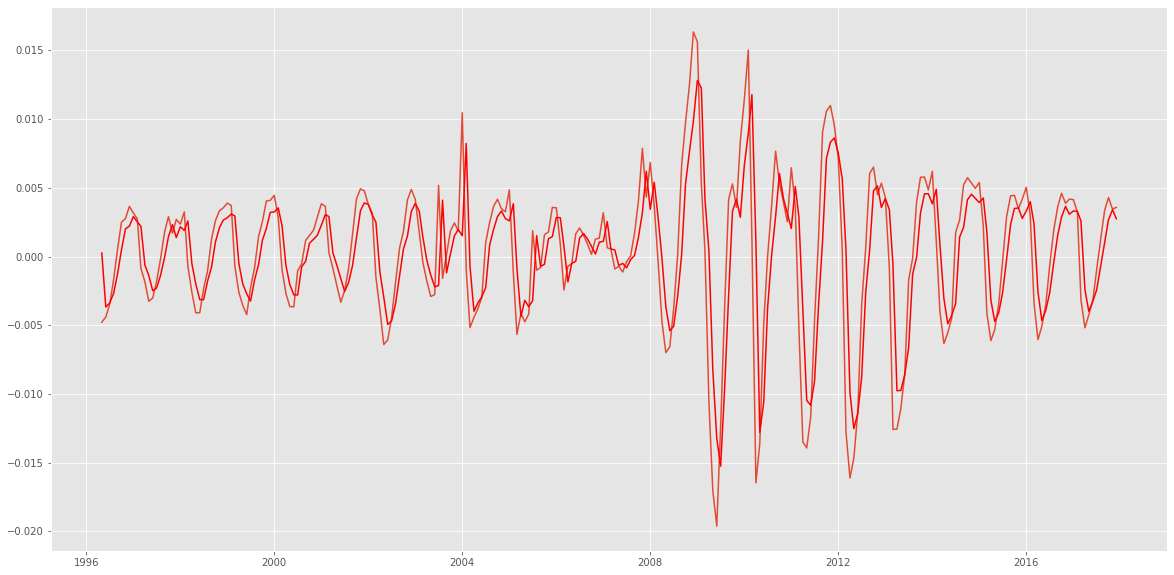

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

train_stop = pd.to_datetime('2017-12-01')


model = ARIMA(inflation_merged['adjusted_pct_change'][:train_stop], order=(1,0,0))
results = model.fit()
print(results.summary())
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)


plt.figure(figsize=(20,10))
plt.plot(inflation_merged['adjusted_pct_change'][:train_stop])
plt.plot(predictions_ARIMA_diff, color='red')

In [104]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

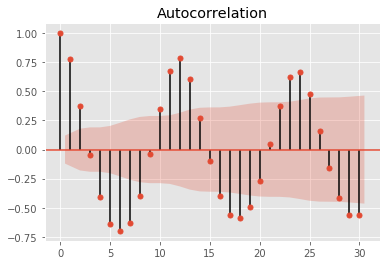

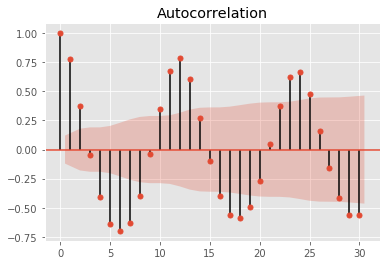

In [105]:
plot_acf(inflation_merged['adjusted_pct_change'], lags=30)

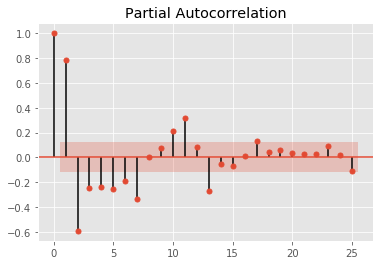

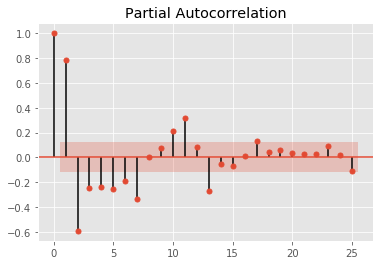

In [106]:
plot_pacf(inflation_merged['adjusted_pct_change'])

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [100]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [109]:
data_diff = inflation_merged['adjusted_pct_change'].diff(periods=1)
data_diff.dropna(inplace=True)
data_diff

1996-06-01    0.000379
1996-07-01    0.000900
1996-08-01    0.001843
1996-09-01    0.002226
1996-10-01    0.001939
                ...   
2017-12-01    0.000126
2018-01-01    0.000587
2018-02-01   -0.002151
2018-03-01   -0.002919
2018-04-01   -0.003944
Name: adjusted_pct_change, Length: 263, dtype: float64

In [110]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_diff,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            print('failed')
            continue

In [111]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 0, 0)
pdqs    (1, 0, 0, 12)
aic          -2248.75
Name: 4, dtype: object

In [112]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(data_diff, 
                                        order=(1,1,0), 
                                        seasonal_order=(0, 0, 0, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1987      0.039     -5.136      0.000      -0.274      -0.123
sigma2       1.47e-05   6.77e-07     21.710      0.000    1.34e-05     1.6e-05


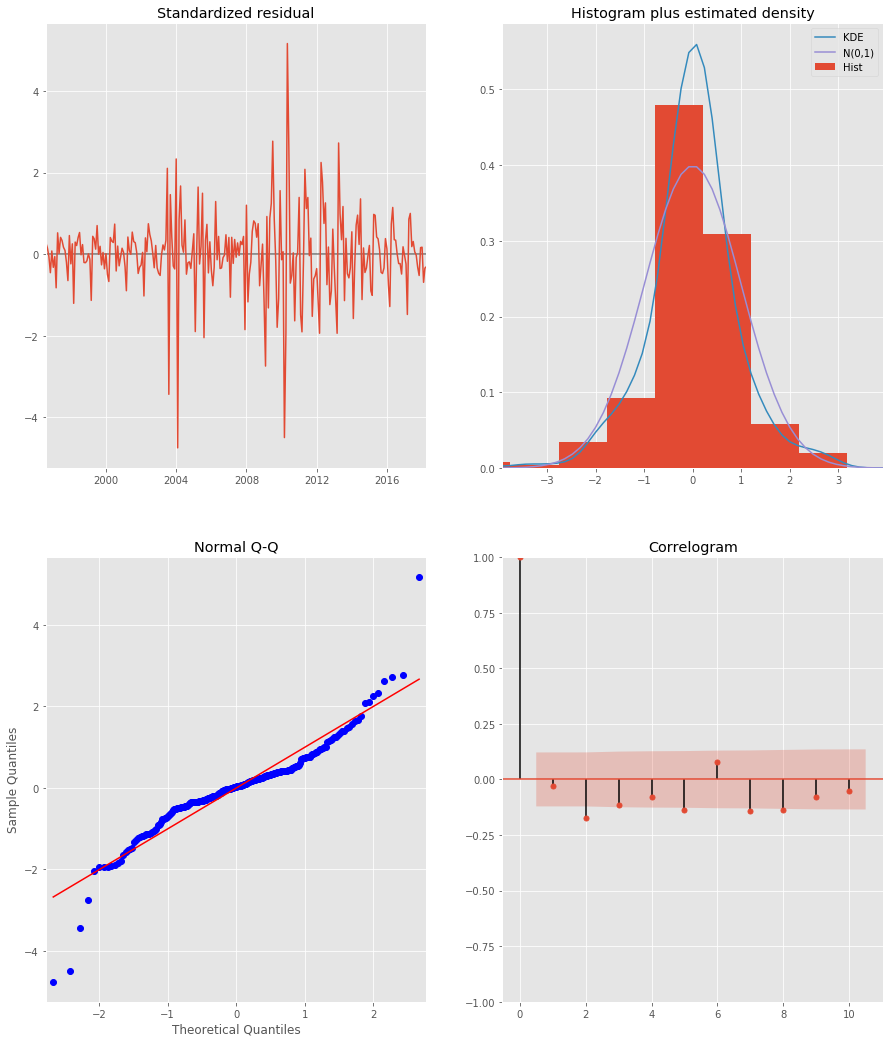

In [113]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [114]:
pred = output.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False,full_results=True)
pred_conf = pred.conf_int()

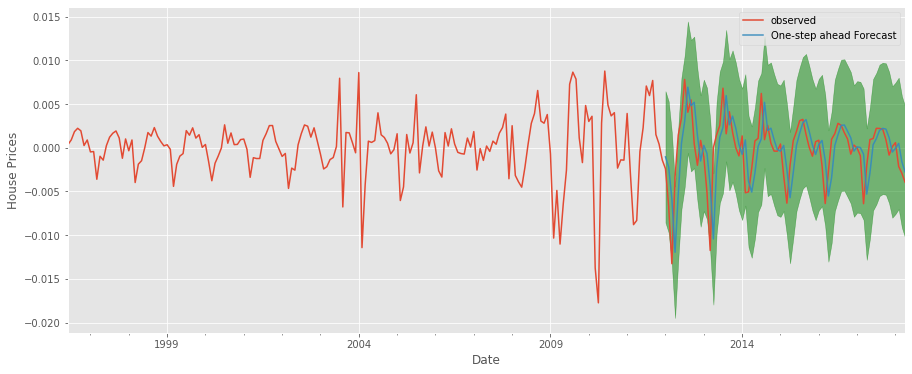

In [115]:
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = data_diff.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
plt.legend()

plt.show()

In [116]:
# Get the real and predicted values
price_forecasted = pred.predicted_mean
price_truth = data_diff['2012-01-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [117]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

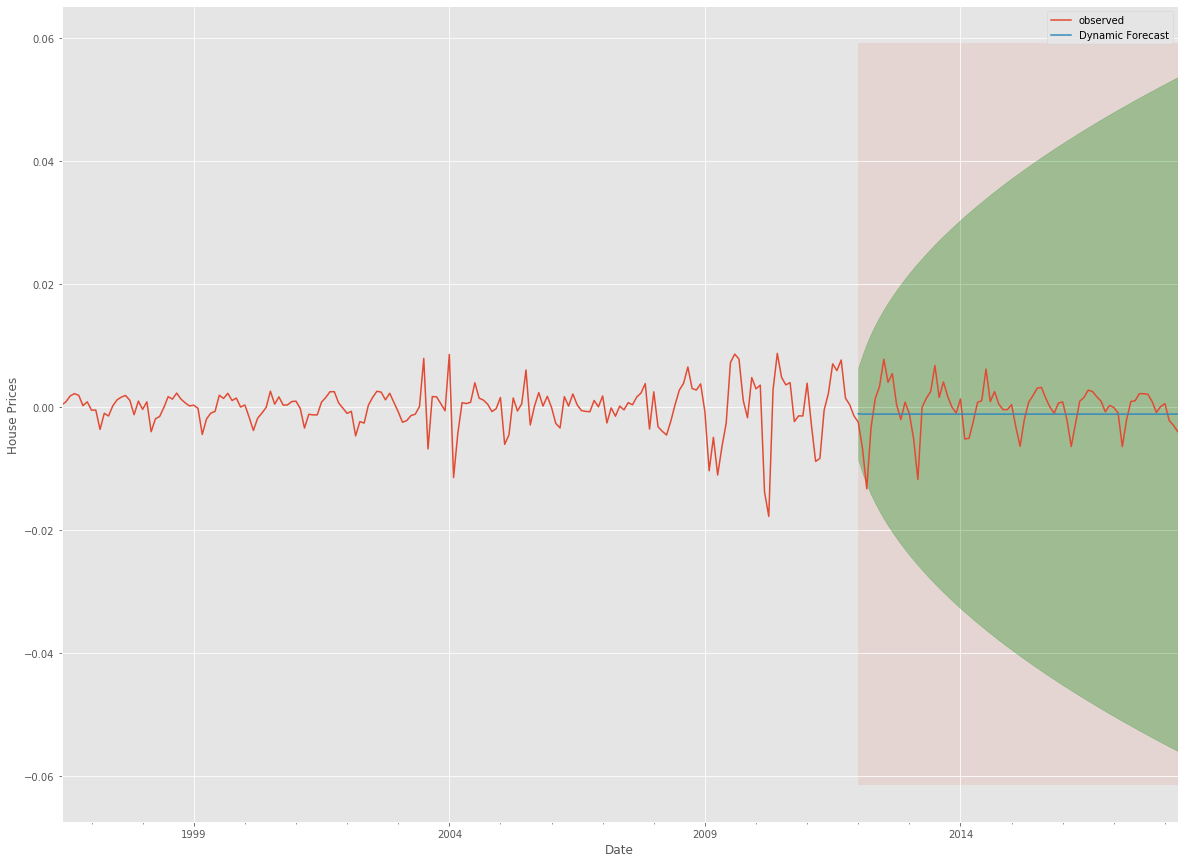

In [118]:
ax = data_diff.plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-01-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()

In [119]:
price_dy_forecasted = pred_dynamic.predicted_mean
price_dy_truth = data_diff['2012-01-01':]

# Compute the mean square error
mse_dy = ((price_dy_forecasted - price_dy_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse_dy, 2)))

The Mean Squared Error of our forecasts is 0.0


In [120]:
prediction = output.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

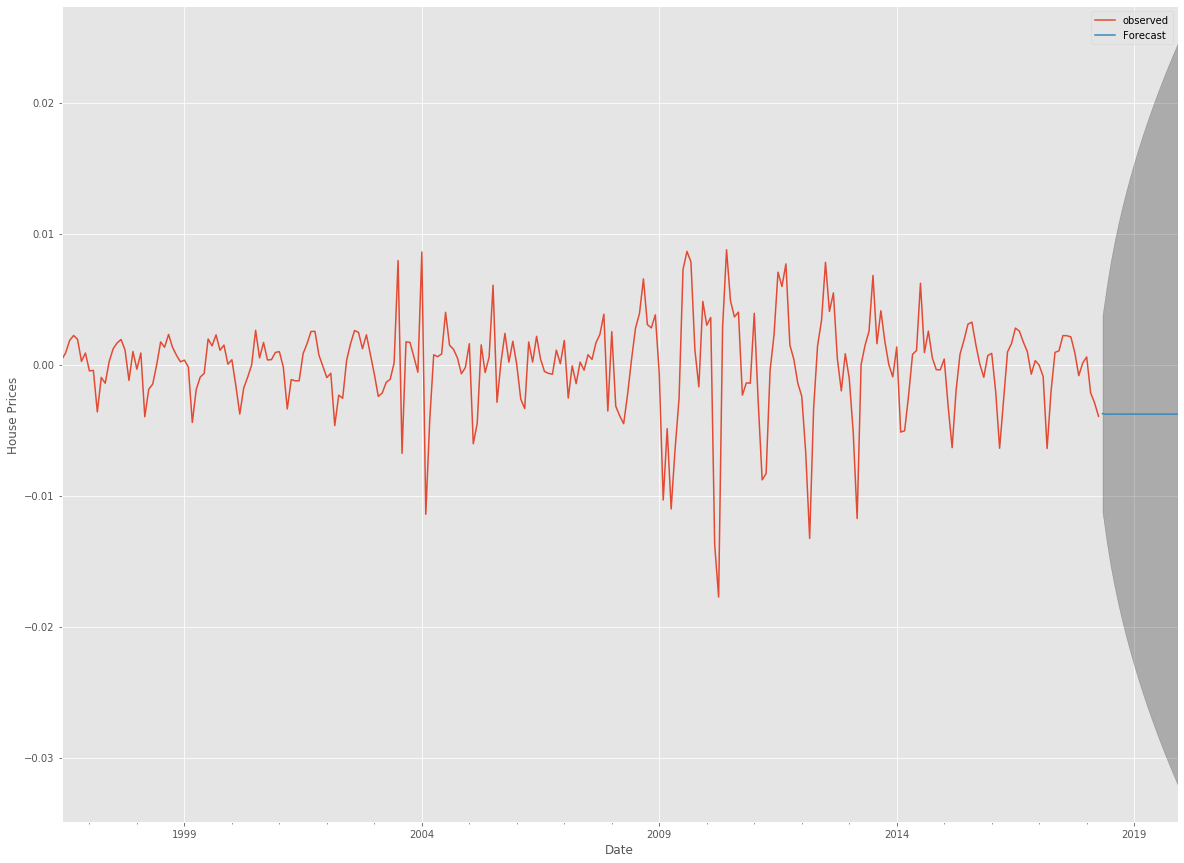

In [121]:
ax = data_diff.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')

plt.legend()
plt.show()